# 构建结构化多重图像网格

在研究不太大的维度数据时，一种有效的方法是对于数据集的不同子集上的实例，分别在不同的图像中绘制。这种技巧有时被称为"格点" (lattice) 或 "网格" (trellis)图。这种方法允许我们可以快速地从复杂数据中提取大量的信息。matplotlib对使用多个轴来绘制图像提供了很好的支持，而seaborn基于matplotlib,将图像的结构与数据集的结构连接起来。

为了使用这一特性，数据必须为Pandas的Dataframe结构,即dataframe的每一列为一个变量，每一行为一次观察。


> 这种格式就是在`seaborn_visual_linear_relationships.ipynb`中提到的"tidy" data的格式。

例如使用`lmplot()`时，我们可以借助`FacetGrid`，方便快捷地创建多重图像来多维度的数据。



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks')

---
## 绘制少量条件信息的图像

`FacetGrid`类在我们希望绘制多个变量之间的分布关系时非常有用。一个`FacetGrid`可以通过三个维度--`row`,`col`和`hue`，来控制输出图像网格。`row`和`col`用来控制输出网格图上两个轴分别对应的变量信息，而`hue`为网格图像增加 "深度轴" ( a depth axis)，对于不同层次的数据，例如在之前的顾客用餐情况的数据中，顾客是否吸烟的信息 (`smoker`) 可以内嵌在顾客性别 (`sex`) 信息中。

用于初始化`FacetGrid`对象的Dataframe数据可以是类别数据或者离散数据，并且数据的每一层上的变量信息都可以使用沿着该变量轴上的`facet`表示。

举例来说，假设我们现在想研究在用餐时间对顾客给小费的多少的影响。

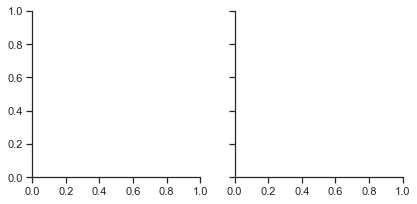

In [2]:
# 使用顾客用餐情况数据集
tips = sns.load_dataset('tips')

# 创建FacetGrid对象，并以用餐时间为列变量
g = sns.FacetGrid(tips, col='time')

初始化`FacetGrid`对象放回的图和在初始化matplotlib图像和轴时返回的图像很类似，只不过`FacetGrid`不在图像上绘制任何东西。

在网格上绘制数据所使用的方法主要为`FacetGrid.map()`。该函数和python内置的`map()`函数功能很想，`FacetGrid.map()`方法会对`FacetGrid`中的每个对象调用多次绘图函数。


我们向`map()`中传入绘制数据的方法函数，并且传入需要绘制的变量名称。例如我们向查看不同用餐时间下，小费的分布直方图：

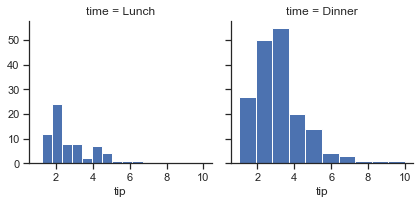

In [4]:
g = sns.FacetGrid(tips, col='time')
g.map(plt.hist, 'tip');  # 传入matplotlib中绘制直方图的函数

在图中可以看到，通过使用`plt.hist`函数，我们绘制了图像并且标记了轴。为了查看变量的关系图，我们可以向`map()`方法中传入变量名称即可:

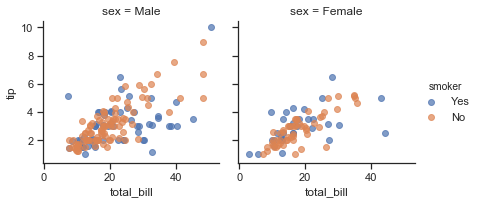

In [7]:
g = sns.FacetGrid(tips, col='sex', hue='smoker')  # 加入层次信息
g.map(plt.scatter, 'total_bill', 'tip', alpha=.7) 
g.add_legend();  # 加入图例信息

`map()`方法自由度很高，我们还可以向其传入seaborn中的绘图函数，定义颜色等：

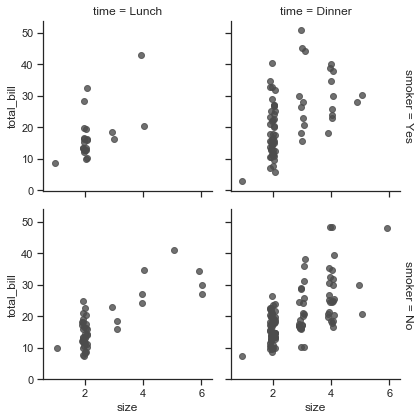

In [15]:
g = sns.FacetGrid(tips, row='smoker', col='time', margin_titles=True)
g.map(sns.regplot, 'size', 'total_bill', color='.3', x_jitter=.1, fit_reg=False);  # 注意颜色信息需要使用""传入

`margin_titles`参数的设置将`total_bill`、`size`、`time`和`smoker`四个信息分别标注在四个边缘区域上，而这个参数没有被matplotlib API正式支持，所以可能不会在所有情况下都正常工作。

需要说明的是，目前`margin_titles`与`add_legend()`不兼容，即在绘制了`margin_titles`时，就不会再添加图例了。

----

`FacetGrid`的图像排序默认是由传入的Dataframe中信息推导出来的，如果`facets`是由类别型数据定义的，则图像的顺序就是类别的顺序。在其他情况下，`facets`的顺序由类别的层次定义。当然，我们也可以通过`*_order`参数来自定义任意`facets`维度上的顺序：

In [20]:
tips.day.value_counts()

ordered_days = tips.day.value_counts().index  # 根据每个星期对应的人数来排序

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

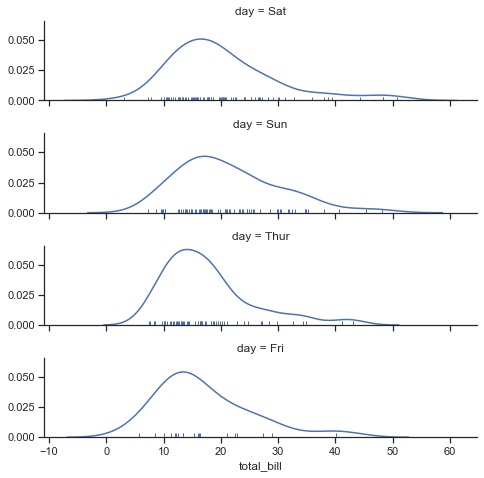

In [21]:
g = sns.FacetGrid(tips, row='day', row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.distplot, 'total_bill', hist=False, rug=True);

在上图中，我们对不同星期中顾客的总消费情况一目了然。

我们还可以向`FacetGrid1`对象传入调色板，以此对不同类别加入颜色区别：

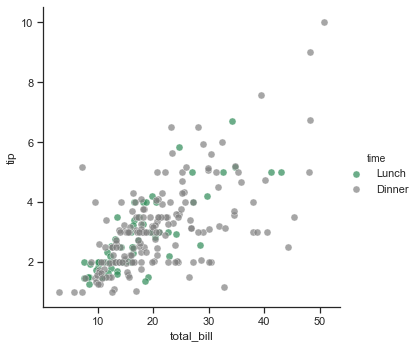

In [23]:
pal = dict(Lunch='seagreen', Dinner='gray')
g = sns.FacetGrid(tips, hue='time', palette=pal, height=5)
g.map(plt.scatter, 'total_bill', 'tip', 
      s=50, alpha=.7,                   # 设置散点大小和透明度
      linewidth=.5, edgecolor='white')  # 设置散点边框的粗细和颜色
g.add_legend();

对于`hue`信息，seaborn提供了`hue_kws`参数，可以传入一个字典来控制其属性：

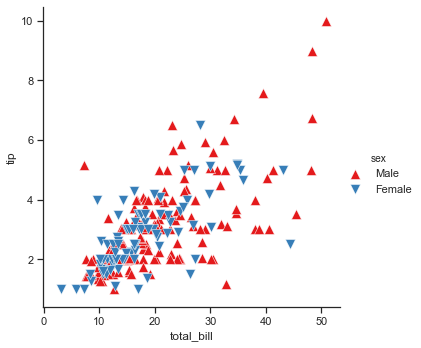

In [24]:
g = sns.FacetGrid(tips, hue='sex', palette='Set1', height=5, hue_kws={'marker': ['^', 'v']})
g.map(plt.scatter, 'total_bill', 'tip', s=100, linewidth=.5, edgecolor='white')
g.add_legend();

---
当一个变量有很多类别时，我们可以将它们分行绘制，需要使用到`col_wrap`来控制列上的个数：

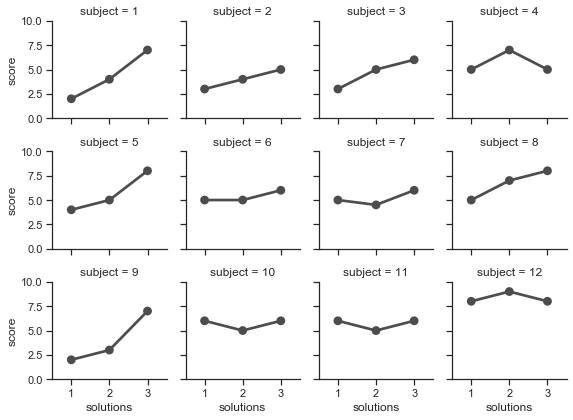

In [25]:
attend = sns.load_dataset('attention').query('subject <= 12')  # 加载12个类别
g = sns.FacetGrid(attend, col='subject', col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, 'solutions', 'score', order=[1, 2, 3], color='.3', ci=None);

如果希望对部分图像的属性，而不是所有的图像，最常用的是`FacetGrid.set()`函数，其可以在更高抽象层次上操作图像。另外还有`FacetGrid.set_axis_labels()`方法可以解决内部`facets`图像没有坐标轴标签信息，例如上图中，上面两行的图像都没轴信息。

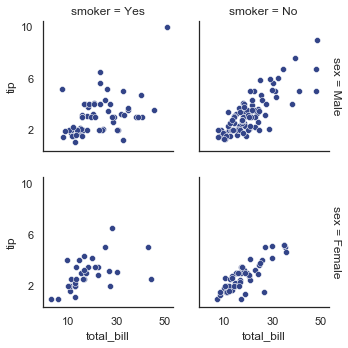

In [32]:
with sns.axes_style('white'):
    g = sns.FacetGrid(tips, row='sex', col='smoker', margin_titles=True, height=2.5)
g.map(plt.scatter, 'total_bill', 'tip', color='#334488', edgecolor='white', linewidth=.5)
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])    # 设置两轴上的刻度
g.fig.subplots_adjust(wspace=.02, hspace=.02);   # 设置每个facet之间的横竖间隔

`sns.axes_style('white')`使得`FacetGrid`的刻度隐藏。

----

为了使用更多自定义化设置，我们可以直接对matplotlib的`Figure`和`Axes`对象操作。我们将matplotlib图像分别使用`fig`和`axes`属性（一个二维数组）来存储。当绘制没有行或者列网格的图像时，可以使用`ax`属性来直接控制一个轴的属性：

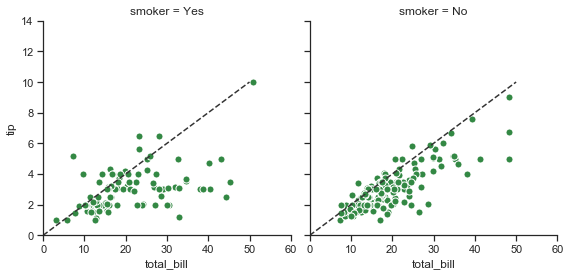

In [43]:
# 使用ax控制单一轴
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes.flat:  # 获取facets的轴
    ax.plot((0, 50), (0, 10), color='.2', linestyle='--')
g.set(xlim=(0, 60), ylim=(0, 14));

----

## 使用自定义的函数

`FacetGrid`可以充分地定制化，使用`FacetGrid.map()`函数时，并不局限于传入matplotlib或者seaborn的绘图函数，我们可以自定义绘图函数。

自定义函数有几个点需要注意：

1. 图像必须绘制在matplotlib活动轴 ( "current active" Axes )上。
    * 如果我们使用`matplotlib.pyplot`命名空间下的函数时，可以使用`matplotlib.pyplot.gca()`方法来获取当前活动轴的引用
2. 必须可以接受位置参数作为绘图的数据。
    * 对于`map()`函数，`FacetGrid`会对每个位置参数传入一个数据序列(Series)
3. 必须可以接受`color`和`label`参数，并且理想地，可以对这些参数做些有用的功能
    * 大多数情况下，最简单的方式是传入一个`**kwargs`字典，并将参数传给内部的绘图函数

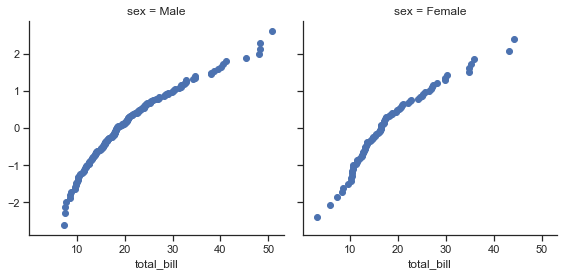

In [4]:
# 导入scipy中的统计模块
from scipy import stats  

def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)
    
g = sns.FacetGrid(tips, col='sex', height=4)
g.map(quantile_plot, 'total_bill');

`stats.probplot`函数可以用来检验样本数据是否服从某种概率分布，默认情况下为检验是否正态。会出的图像越是接近直线，则说明数据分布越是接近验证的概率分布。


如果我们希望绘制一个双变量的图，则定义的绘图函数中，应该先传入x-轴变量参数，再传入y-轴变量参数：

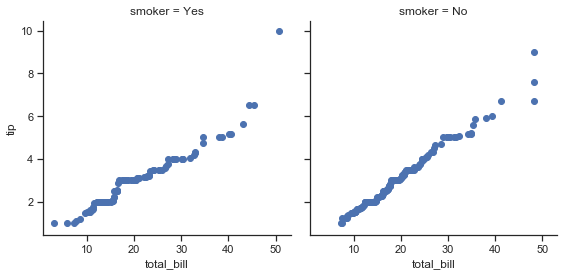

In [5]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sns.FacetGrid(tips, col="smoker", height=4)
g.map(qqplot, "total_bill", "tip");

在定制绘图函数中，我们使用的是`plt.scatter`函数，而该函数可接受`color`和`label`参数。我们可以添加`hue`信息，以此将同一层级的不同类别数据使用不同颜色区分来了：

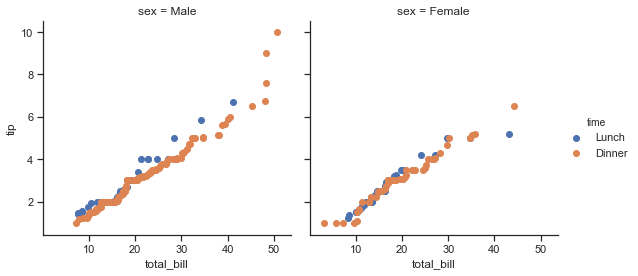

In [8]:
g = sns.FacetGrid(tips, hue="time", col="sex", height=4)
g.map(qqplot, "total_bill", "tip")
g.add_legend();

更多绘图样式，自行探索吧！

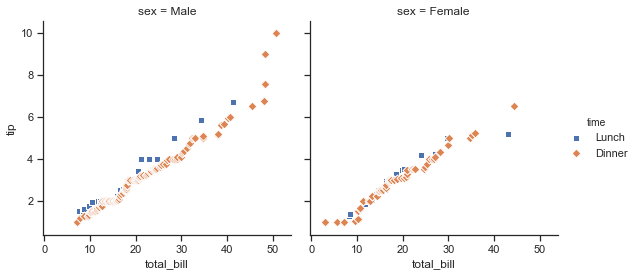

In [9]:
g = sns.FacetGrid(tips, hue="time", col="sex", height=4,
                  hue_kws={"marker": ["s", "D"]})
g.map(qqplot, "total_bill", "tip", s=40, edgecolor="w")
g.add_legend();

---

## 绘制成对型数据的关系

之前的教程中提到的`PairGrid`函数，其允许我们在网格中绘制多个相同类型的子图。`PairGrid`的每行每列都赋予不同的变量，于是网格中每幅图都代表者两个不同变量之间的关系图。

`FacetGrid`和`PairGrid`的区别是很明显的：前者显示一对关系中，多个层级信息变量之间的关系。后者可以显示多对关系。两个网格函数各有春秋，`PairGrid`缺少了表示数据变量内部层级之间的变量关系的能力，但是其为我们提供了一种快速观察不同高层次信息间关系的方法。

`PairGrid`的使用方式与`FacetGrid`很相似，都需要向`mpa()`函数传入绘图方式：

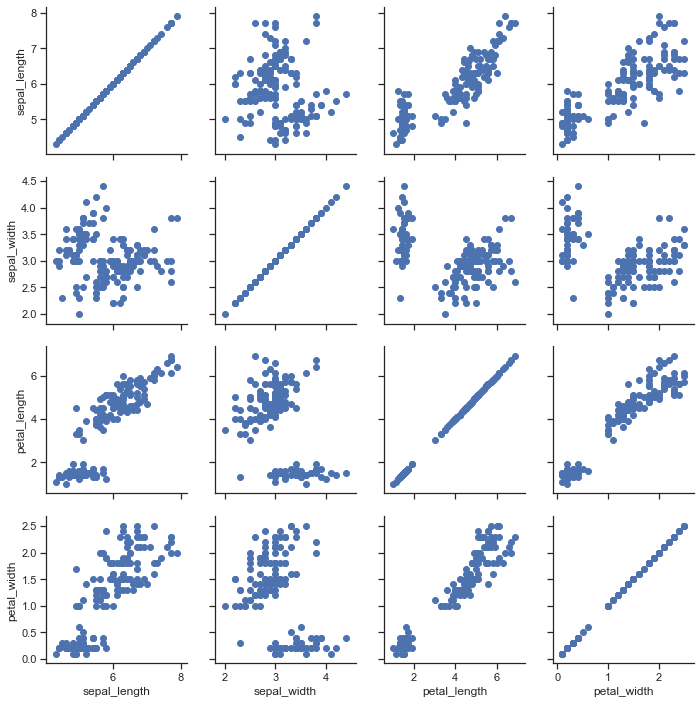

In [10]:
iris = sns.load_dataset("iris")
g = sns.PairGrid(iris)
g.map(plt.scatter);

我们还可以设置对角线和非对角线上不同的绘制函数：

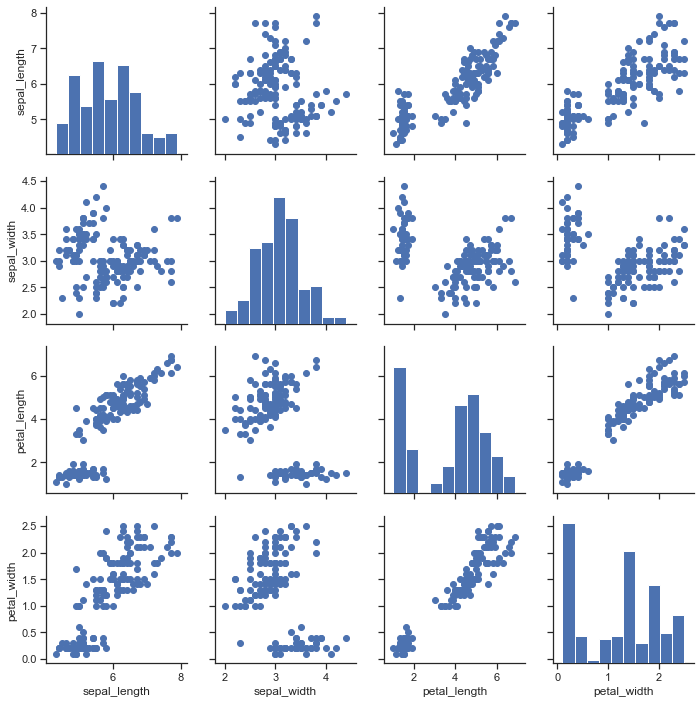

In [11]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

或者更具体点，对上三角、对角线、下三角的图分别使用不同的函数绘制：

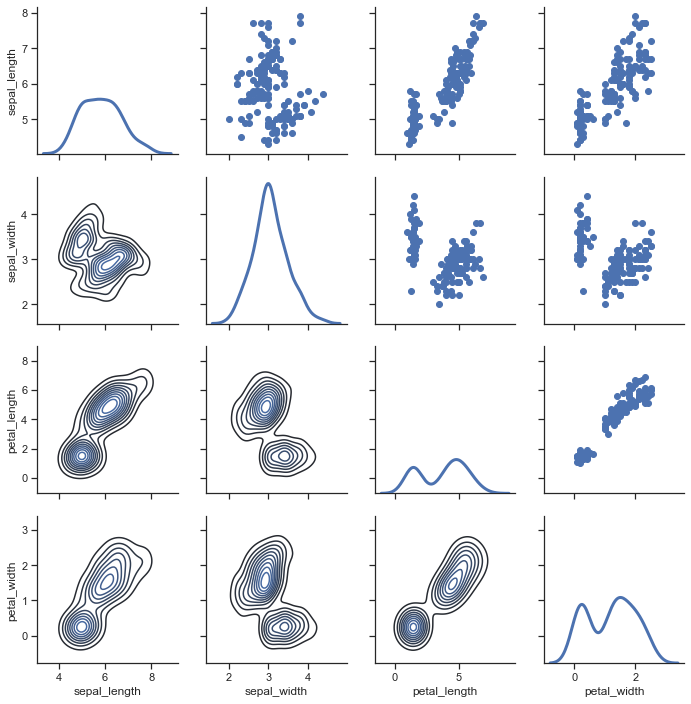

In [15]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False);

----
为了给图像增加"亿点"颜色，最简捷地方式是使用`hue`等信息，区分开不同的类别变量：

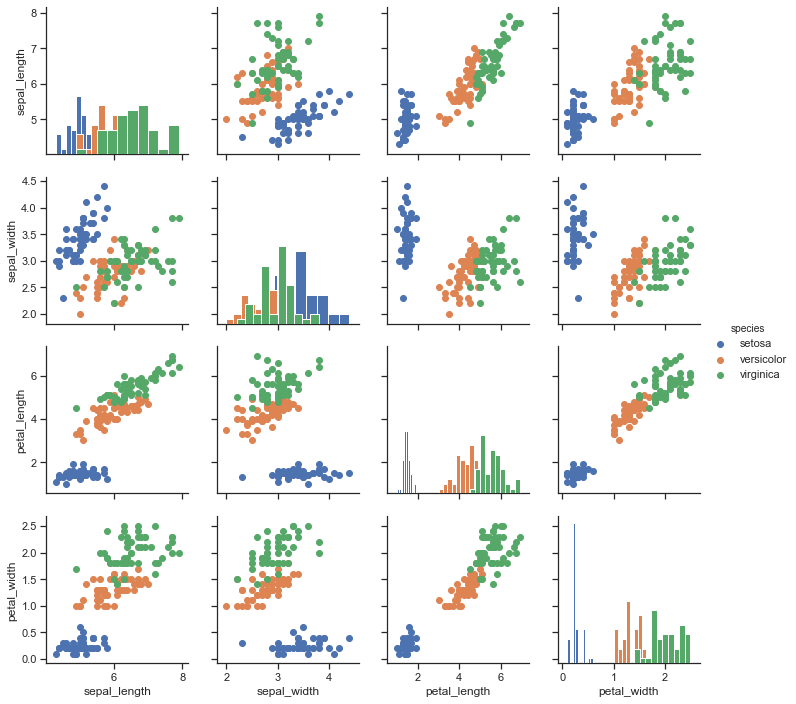

In [12]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

更进一步，传入一个调色板，获得渐变颜色效果：

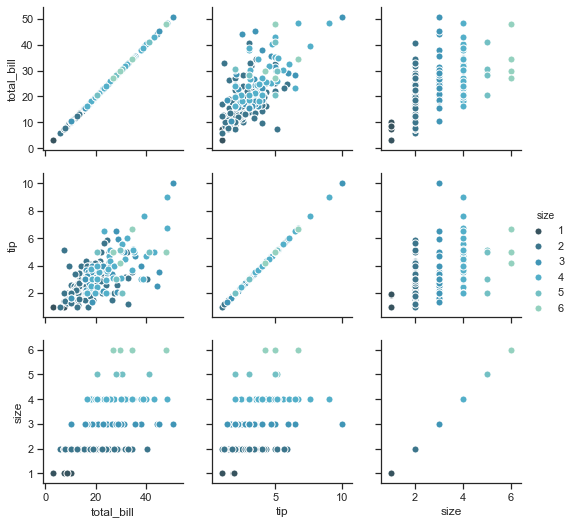

In [18]:
g = sns.PairGrid(tips, hue="size", palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend();

----

默认情况下，`PairGrid`默认会使用数据集中所有的数据列，我们可以自己定义需要展示的数据列：

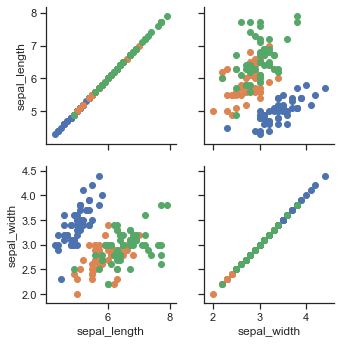

In [13]:
g = sns.PairGrid(iris, vars=['sepal_length', 'sepal_width'], hue='species')
g.map(plt.scatter);

除了绘制两两对应的变量关系，我们还可以自定义`PairGrid`展示多对一，或者一对多的关系：

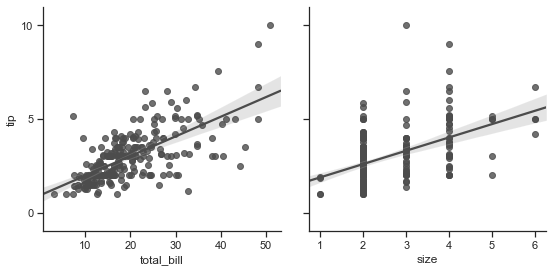

In [16]:
g = sns.PairGrid(tips, y_vars=["tip"], x_vars=["total_bill", "size"], height=4)
g.map(sns.regplot, color=".3")
g.set(ylim=(-1, 11), yticks=[0, 5, 10]);

---

如果你觉得使用`PairGird`时，需要先创建一个`PairGrid`对象，再定义`map()`函数进行绘图，这样的步骤有点多。或许你可以试一试`pairplot`方法，其基于`PairGird`,我们可以同样可以设置对角线和非对角线上的绘图方式。

> 默认情况下，对角线上直方图，非对角线上为散点图。

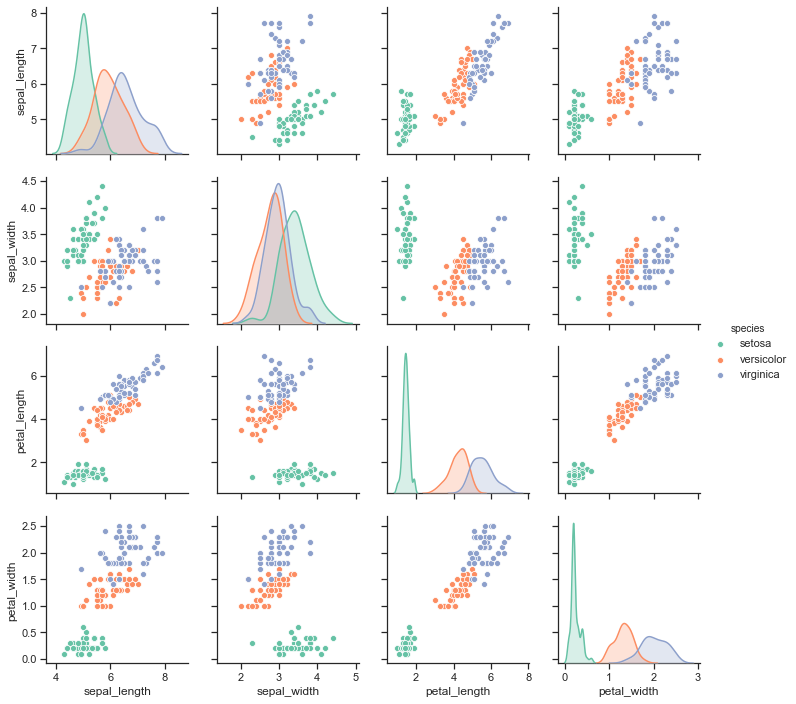

In [19]:
g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", height=2.5)